# EDA — Prédiction du Churn Client (désabonnement)– Projet Data Science
**Auteur :** MACHAY Fatima 

**Date :** 2025-10-06  

**Objectif :** Développer un pipeline complet de Machine Learning supervisé permettant de prédire le désabonnement des clients (churn) au sein d’une entreprise de télécommunications, dans le but de mieux cibler les actions de fidélisation et de réduire la perte de clientèle.
Parallèlement, analyser et explorer les données clients afin d’identifier les facteurs clés qui influencent le risque de désabonnement. 


In [191]:
import pandas as pd 
data = pd.read_csv("../DATA/churn.csv")
data
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [192]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [193]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [194]:
import numpy as np
data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [195]:
import numpy as np
data.duplicated().sum()

np.int64(0)

In [ ]:
# Colonnes à exclure
colonnes_a_exclure = ['MonthlyCharges', 'TotalCharges', 'tenure', 'customerID']
# Sélectionner les colonnes restantes
colonnes_a_analyser = [col for col in data.columns if col not in colonnes_a_exclure]
# Boucle pour value_counts
for col in colonnes_a_analyser:
    print(f"\n🔹 Value counts pour {col} :")
    print(data[col].value_counts())




In [ ]:
# Transformer en numérique, convertir les valeurs invalides en NaN (TotalCharges)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

data.info()
data.to_csv()
data['TotalCharges'].isnull().sum()

total_charges_mean=data['TotalCharges'].mean()
total_charges_mean
data['TotalCharges']= data['TotalCharges'].fillna(total_charges_mean)
data['TotalCharges'].isnull().sum()


In [ ]:
# Visualisations univariées :
# 1- Variables numériques
import matplotlib.pyplot as plt
import seaborn as sns
numerique_features = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerique_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], bins=30, kde=False, color='green')
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre de clients")
    plt.show()



In [ ]:

colonne_to_plot=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']


def count_plot_affichage(column_name):
    plt.figure(figsize=(8,4))
    sns.countplot(x=column_name, data=data, hue='Churn')
    plt.title(f"Churn by {column_name}")
    plt.xticks(rotation=45)
    plt.show()

for col in colonne_to_plot:
    count_plot_affichage(col)

In [ ]:

colonne_to_plot = ['gender','Partner','Dependents','PhoneService','MultipleLines',
                   'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                   'TechSupport','StreamingTV','StreamingMovies','Contract',
                   'PaperlessBilling','PaymentMethod']

n_cols = len(colonne_to_plot)  # toutes les colonnes sur 1 ligne
fig, axes = plt.subplots(6,3, figsize=(18, 20))  # 1 ligne, n_cols colonnes
axes = axes.flatten()  # au cas où axes n'est pas 1D

for i, col in enumerate(colonne_to_plot):
    sns.countplot(x=col, data=data, hue='Churn', ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
# new_data = data.loc[:, ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
# new_data['Churn'] = new_data['Churn'].str.strip().str.upper()

# new_data['Churn'] = new_data['Churn'].map(lambda x: 0 if x == "No" else 1)
# new_data
# print(new_data['Churn'].unique())

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['Churn'] = encoder.fit_transform(data["Churn"])
data
print(data['Churn'].unique())

[0]


<!-- transformer Totalcharges en 1 et 2 -->

In [ ]:


# # J'ai changer le Non et Yes to 1 et 0  de Churn pour faire la coreelation

[0]


<!-- Convertir les variables categoriales en numérique -->
pour faire la correlation  : on ana des variables binaires (yes/NO), (male/female)

In [293]:

numeric_cols = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn']

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce') 

data[numeric_cols] = data[numeric_cols].fillna(0)
corr_matrix = new_data[numeric_cols].corr()
print(corr_matrix)


                SeniorCitizen    tenure  MonthlyCharges  TotalCharges  Churn
SeniorCitizen        1.000000  0.016567        0.220173      0.102395    NaN
tenure               0.016567  1.000000        0.247900      0.824757    NaN
MonthlyCharges       0.220173  0.247900        1.000000      0.650468    NaN
TotalCharges         0.102395  0.824757        0.650468      1.000000    NaN
Churn                     NaN       NaN             NaN           NaN    NaN


<!-- La matrice de correlation  -->

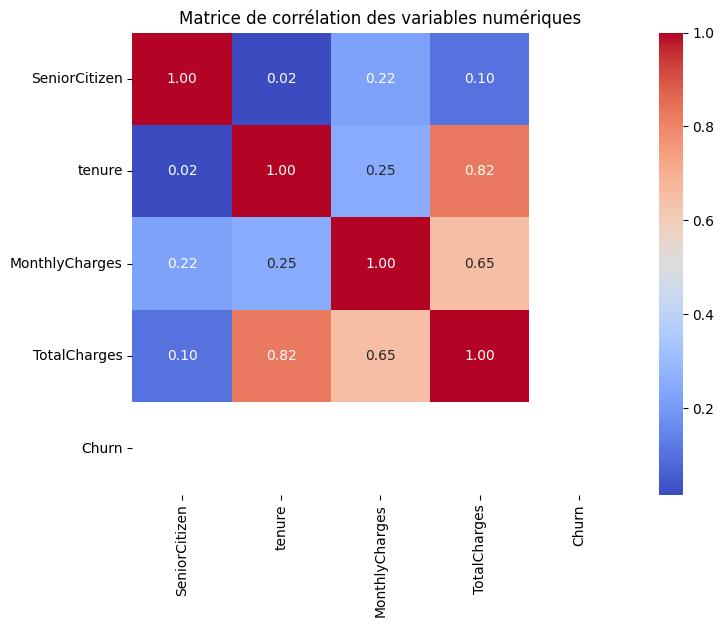

In [268]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des variables numériques")
plt.show()